#                                    Demo Linear Regression - r

## Importing Libraries

In [10]:
#install.packages("GGally",repos="https://cloud.r-project.org/")
library(ggplot2)
library(GGally)
library(PerformanceAnalytics)
library(corrplot)
options(warn=-1)
options(repr.plot.width=4, repr.plot.height=4)
library(gridExtra)

Warning message:
"package 'GGally' was built under R version 3.4.3"Warning message:
"package 'PerformanceAnalytics' was built under R version 3.4.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.4.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.4.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend

corrplot 0.84 loaded


### Reading input data
Input data contain below variables

- compn_curr(**Target Variable**) - Current Compensation of the agent

- agentID - Agent ID

- age - Age of Agent

- education - Education level of agent (Low, Medium, High)

- Location

- sub_members - Subordinate men=mber working for the agent

- commmitment - Is Agent part time(P) or Full time(F) agent

- returned_orders - dollar value of orders returned by the agent

- compn_prev - Compensation earned by agent last month


In [152]:
data = read.csv("test_data_RF.csv")
head(data)

agentID,age,education,Location,years_mem,sub_members,commitment,returned_orders,compn_prev,compn_curr
1,42,lower,SF,7,12,F,369,819,731.0740
2,28,medium,WA,3,13,F,136,377,755.6294
3,45,higher,DE,6,2,F,38,203,545.5058
4,33,lower,TX,10,6,P,31,31,456.3678
5,32,higher,TX,9,20,P,173,398,813.7908
6,45,medium,DE,0,7,F,237,720,668.4394


In [2]:
data  = read.csv("test_data_RF.csv")
head(data)

agentID,age,education,Location,years_mem,sub_members,commitment,returned_orders,compn_prev,compn_curr
1,42,lower,SF,7,12,F,369,819,731.0740
2,28,medium,WA,3,13,F,136,377,755.6294
3,45,higher,DE,6,2,F,38,203,545.5058
4,33,lower,TX,10,6,P,31,31,456.3678
5,32,higher,TX,9,20,P,173,398,813.7908
6,45,medium,DE,0,7,F,237,720,668.4394


In [4]:
summary(data)

    agentID           age         education  Location   years_mem    
 Min.   : 1.00   Min.   :26.00   higher:19   DE:12    Min.   : 0.00  
 1st Qu.:13.25   1st Qu.:32.00   lower :17   SF:13    1st Qu.: 1.00  
 Median :25.50   Median :37.50   medium:14   TX:13    Median : 4.00  
 Mean   :25.50   Mean   :37.26               WA:12    Mean   : 4.42  
 3rd Qu.:37.75   3rd Qu.:42.00                        3rd Qu.: 7.00  
 Max.   :50.00   Max.   :50.00                        Max.   :10.00  
  sub_members    commitment returned_orders   compn_prev      compn_curr     
 Min.   : 0.00   F:25       Min.   : 19.0   Min.   : 31.0   Min.   :  31.78  
 1st Qu.: 4.00   P:25       1st Qu.:108.8   1st Qu.:208.5   1st Qu.: 419.32  
 Median : 8.00              Median :212.5   Median :495.0   Median : 610.45  
 Mean   : 8.98              Mean   :230.9   Mean   :519.4   Mean   : 592.26  
 3rd Qu.:13.75              3rd Qu.:364.8   3rd Qu.:825.0   3rd Qu.: 749.61  
 Max.   :20.00              Max.   :498.0 

### How data looks

In [11]:
str(data)
summary(data)

'data.frame':	50 obs. of  10 variables:
 $ agentID        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ age            : int  42 28 45 33 32 45 41 40 50 44 ...
 $ education      : Factor w/ 3 levels "higher","lower",..: 2 3 1 2 1 3 1 2 2 2 ...
 $ Location       : Factor w/ 4 levels "DE","SF","TX",..: 2 4 1 3 3 1 3 2 2 2 ...
 $ years_mem      : int  7 3 6 10 9 0 6 0 4 1 ...
 $ sub_members    : int  12 13 2 6 20 7 4 19 0 3 ...
 $ commitment     : Factor w/ 2 levels "F","P": 1 1 1 2 2 1 1 2 2 1 ...
 $ returned_orders: int  369 136 38 31 173 237 352 207 199 52 ...
 $ compn_prev     : int  819 377 203 31 398 720 81 836 862 795 ...
 $ compn_curr     : num  731 756 546 456 814 ...


    agentID           age         education  Location   years_mem    
 Min.   : 1.00   Min.   :26.00   higher:19   DE:12    Min.   : 0.00  
 1st Qu.:13.25   1st Qu.:32.00   lower :17   SF:13    1st Qu.: 1.00  
 Median :25.50   Median :37.50   medium:14   TX:13    Median : 4.00  
 Mean   :25.50   Mean   :37.26               WA:12    Mean   : 4.42  
 3rd Qu.:37.75   3rd Qu.:42.00                        3rd Qu.: 7.00  
 Max.   :50.00   Max.   :50.00                        Max.   :10.00  
  sub_members    commitment returned_orders   compn_prev      compn_curr     
 Min.   : 0.00   F:25       Min.   : 19.0   Min.   : 31.0   Min.   :  31.78  
 1st Qu.: 4.00   P:25       1st Qu.:108.8   1st Qu.:208.5   1st Qu.: 419.32  
 Median : 8.00              Median :212.5   Median :495.0   Median : 610.45  
 Mean   : 8.98              Mean   :230.9   Mean   :519.4   Mean   : 592.26  
 3rd Qu.:13.75              3rd Qu.:364.8   3rd Qu.:825.0   3rd Qu.: 749.61  
 Max.   :20.00              Max.   :498.0 

### Data Exploration
There are two types of variables
* Numeric - age	years_mem	sub_members	returned_orders	compn_prev	compn_curr
* Categorical - education, location, commitment

agentID is ID variable. It will not be included in analysis.



### Exploring Numeric Variables
Below chart shows the correlation between the numeric variables.

We see that target **compn_curr** is highly correlated with **"sub_members"** and **"compn_prev"**.

,age,years_mem,sub_members,returned_orders,compn_prev,compn_curr
age,1.00000000,0.03603997,-0.187913070,-0.066803882,0.07667244,0.04463295
years_mem,0.03603997,1.00000000,0.011692799,0.123292422,-0.27617557,-0.11380047
sub_members,-0.18791307,0.01169280,1.000000000,-0.005495489,0.21164740,0.66356996
returned_orders,-0.06680388,0.12329242,-0.005495489,1.000000000,-0.02541715,-0.49282922
compn_prev,0.07667244,-0.27617557,0.211647398,-0.025417153,1.00000000,0.64193196
compn_curr,0.04463295,-0.11380047,0.663569961,-0.492829225,0.64193196,1.00000000


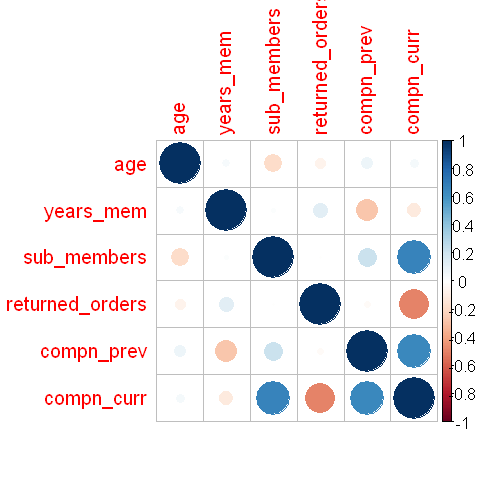

In [11]:
sub_data = data[,c('age','years_mem','sub_members','returned_orders','compn_prev','compn_curr')]
corr = cor(sub_data)
corr


corrplot(corr)

,age,years_mem,sub_members,returned_orders,compn_prev,compn_curr
age,1.00,0.04,-0.19,-0.07,0.08,0.04
years_mem,0.04,1.00,0.01,0.12,-0.28,-0.11
sub_members,-0.19,0.01,1.00,-0.01,0.21,0.66
returned_orders,-0.07,0.12,-0.01,1.00,-0.03,-0.49
compn_prev,0.08,-0.28,0.21,-0.03,1.00,0.64
compn_curr,0.04,-0.11,0.66,-0.49,0.64,1.00


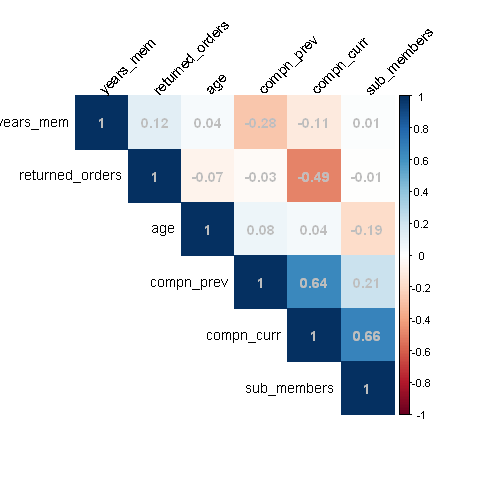

In [48]:
sub_data = data[,c('age','years_mem','sub_members','returned_orders','compn_prev','compn_curr')]
corr = cor(sub_data)
round(corr,2)

par(cex = 0.7)
corrplot(corr, type = "upper", tl.col = "black", tl.srt = 45,method = "color", addCoef.col="grey", order = "AOE")

### Plotting Scatters

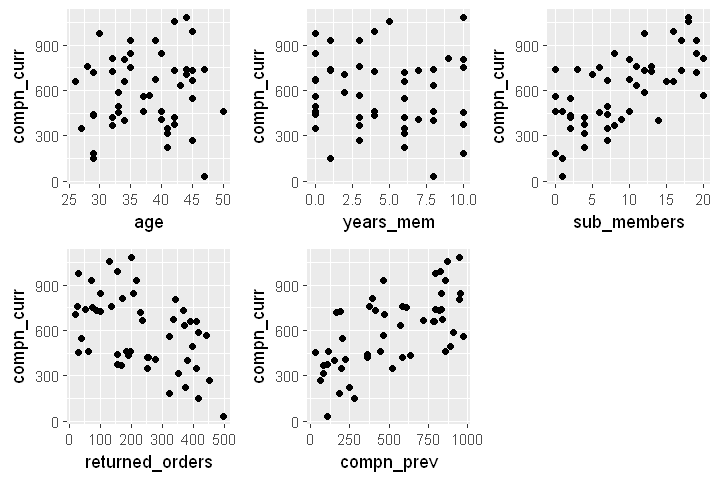

In [94]:

options(repr.plot.width=6, repr.plot.height=4)
plot1 <- ggplot(sub_data, aes(x=age, y=compn_curr)) +  geom_point()
plot2 <- ggplot(sub_data, aes(x=years_mem, y=compn_curr)) +  geom_point()
plot3 <- ggplot(sub_data, aes(x=sub_members, y=compn_curr)) +  geom_point()
plot4 <- ggplot(sub_data, aes(x=returned_orders, y=compn_curr)) +  geom_point()
plot5 <- ggplot(sub_data, aes(x=compn_prev, y=compn_curr)) +  geom_point()
grid.arrange(plot1, plot2,plot3,plot4,plot5,ncol=3,nrow=2)



### Exploring Categorical Variables

In [96]:
levels(data$education)
levels(data$Location)

[1] "higher" "lower"  "medium"

[1] "DE" "SF" "TX" "WA"

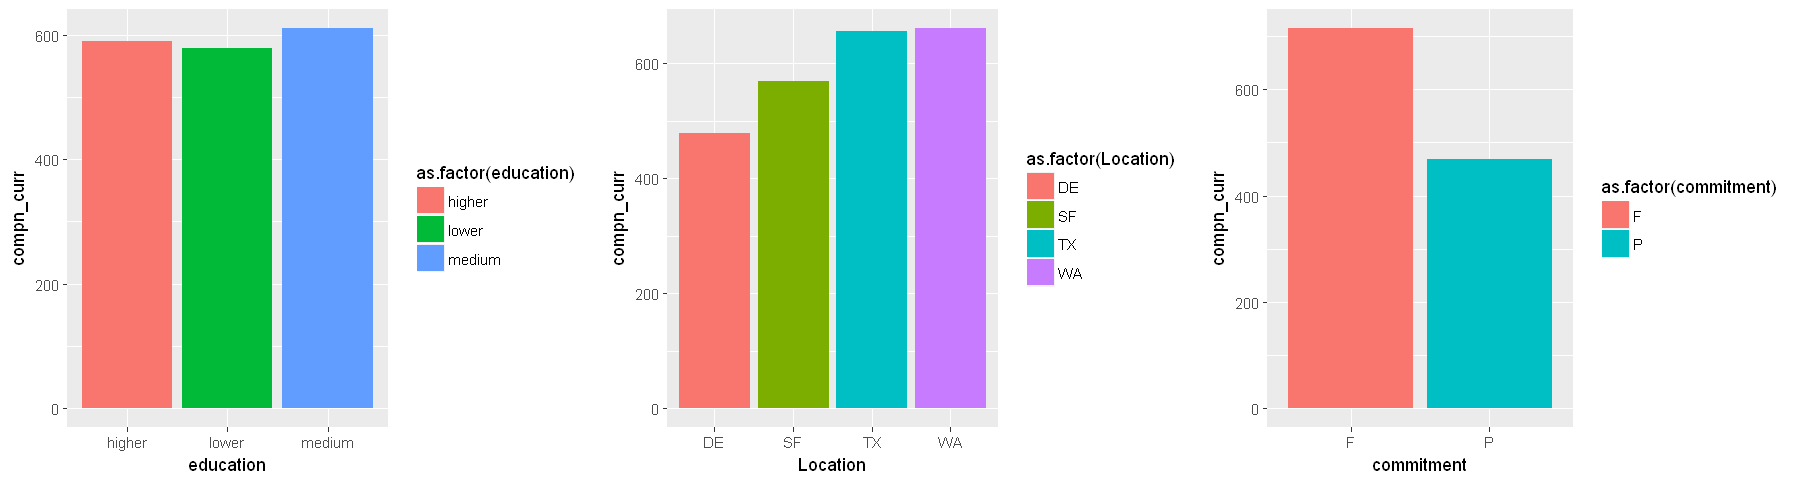

In [109]:
options(repr.plot.width=15, repr.plot.height=4)
plot1 = ggplot(data) + geom_bar(aes(education, compn_curr, fill = as.factor(education)), 
           position = "dodge", stat = "summary", fun.y = "mean")
plot2 = ggplot(data) + geom_bar(aes(Location, compn_curr, fill = as.factor(Location)), 
           position = "dodge", stat = "summary", fun.y = "mean")
plot3 = ggplot(data) + geom_bar(aes(commitment, compn_curr, fill = as.factor(commitment)), 
           position = "dodge", stat = "summary", fun.y = "mean")

grid.arrange(plot1, plot2,plot3,ncol=3)

### Linear Regression 
We are creating a linear regression model to predict out target variable i.e. compn_curr. There are other techniques available but we focus on Linear regression currently.

In [112]:
model1 = lm(compn_curr~age+as.factor(education)+as.factor(Location)+years_mem+sub_members+as.factor(commitment)+
   returned_orders+compn_prev,data=data)

summary(model1)


Call:
lm(formula = compn_curr ~ age + as.factor(education) + as.factor(Location) + 
    years_mem + sub_members + as.factor(commitment) + returned_orders + 
    compn_prev, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.344  -5.598  -1.104   6.189  18.748 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 4.170e+02  1.336e+01  31.212  < 2e-16 ***
age                         2.708e-01  2.927e-01   0.925   0.3606    
as.factor(education)lower  -2.887e+01  3.941e+00  -7.325 8.97e-09 ***
as.factor(education)medium -1.895e+01  4.122e+00  -4.598 4.63e-05 ***
as.factor(Location)SF      -3.028e+00  4.679e+00  -0.647   0.5214    
as.factor(Location)TX       8.840e+00  4.713e+00   1.876   0.0684 .  
as.factor(Location)WA       2.386e+00  4.807e+00   0.496   0.6225    
years_mem                   5.184e+00  4.948e-01  10.477 9.21e-13 ***
sub_members                 2.134e+01  2.675e-01  79.754  < 2e-16 ***
as.f

As we see that **"Age"** is not a significant variable in model1 we will exclude this variable and create a new model below.

A variable is significant when its **Pr(>|t|)** is less that **0.05**.

In [115]:
model2 = lm(compn_curr~as.factor(education)+as.factor(Location)+years_mem+sub_members+as.factor(commitment)+
   returned_orders+compn_prev,data=data)

summary(model2)



Call:
lm(formula = compn_curr ~ as.factor(education) + as.factor(Location) + 
    years_mem + sub_members + as.factor(commitment) + returned_orders + 
    compn_prev, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.479  -5.923  -1.187   6.820  17.919 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 4.281e+02  5.988e+00  71.488  < 2e-16 ***
as.factor(education)lower  -2.895e+01  3.933e+00  -7.361 6.88e-09 ***
as.factor(education)medium -1.926e+01  4.101e+00  -4.696 3.25e-05 ***
as.factor(Location)SF      -2.486e+00  4.634e+00  -0.537   0.5947    
as.factor(Location)TX       7.622e+00  4.517e+00   1.687   0.0995 .  
as.factor(Location)WA       1.345e+00  4.665e+00   0.288   0.7747    
years_mem                   5.262e+00  4.866e-01  10.813 2.67e-13 ***
sub_members                 2.130e+01  2.640e-01  80.683  < 2e-16 ***
as.factor(commitment)P     -1.257e+02  3.313e+00 -37.956  < 2e-16 ***
returned_o

### Model Performance 
#### Residual Plots

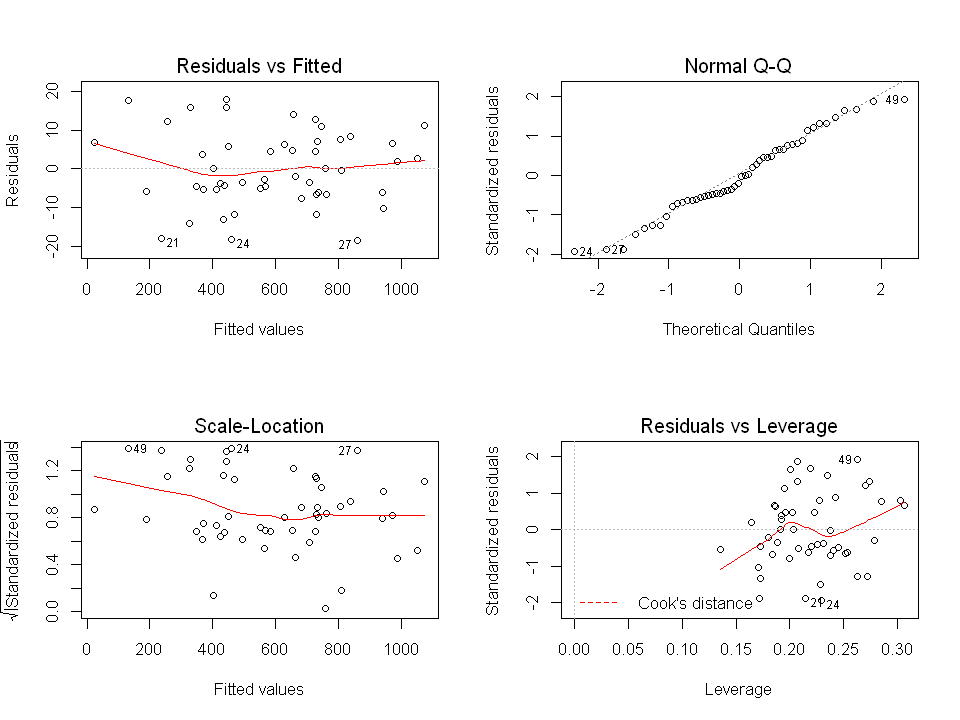

In [126]:
options(repr.plot.width=8, repr.plot.height=6)
par(mfrow=c(2,2))
plot(model2)

### Predictions using the model 

In [140]:
pred_result=cbind.data.frame(Actual=data$compn_curr,Fitted=fitted(model2),Error=residuals(model2))
head(pred_result)

rmse_train=sqrt(mean(pred_result$Error^2))
print(paste("Root Mean Square Error: ",as.character(round(rmse_train,4))))

Actual,Fitted,Error
731.0740,726.5875,4.486489
755.6294,744.7359,10.893546
545.5058,550.4473,-4.941564
456.3678,450.4573,5.910491
813.7908,806.1303,7.660431
668.4394,654.4894,13.950007


[1] "Root Mean Square Error:  9.4953"


### Plotting Predictions and Errors 

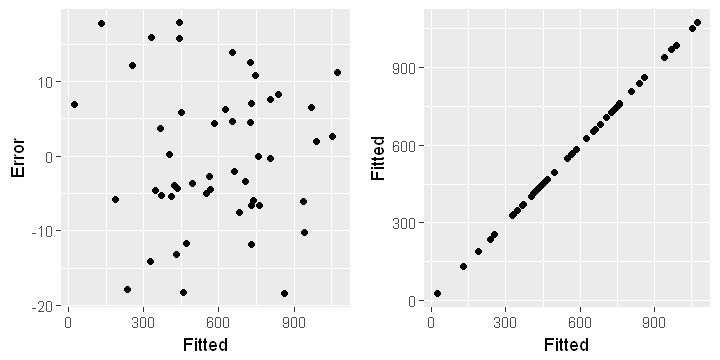

In [151]:
options(repr.plot.width=6, repr.plot.height=3)

plot1= ggplot(pred_result,aes(x=Fitted,y=Error))+geom_point()
plot2 = ggplot(pred_result,aes(x=Fitted,y=Fitted))+geom_point()
grid.arrange(plot1, plot2,ncol=2)